# Kriminal v Veliki Britaniji

s pomočjo spletne strani [UK Crime Stats](https://www.ukcrimestats.com/Police_Force) bomo analizirali kriminal v Veliki Britaniji v preteklem letu. Predvsem bomo poskušali odgovoriti na sledeči vprašanji:
- Kako se je gibalo število kriminala čez leto?
- Katero območje je najbolj varno in kdaj?

## Uvod

V zadnjih letih kriminalna dejavnost prejema vse več pozornosti s strani medijev. Zaradi nestabilnih političnih razmer na območju evrope je razumevanje varnostne situacije po svetu ključnega pomena. Spletna stran [UK Crime Stats](https://www.ukcrimestats.com/Police_Force) omogoča pregled nad vrsto in pogostostjo kaznivih dejanj med policijskimi enotami v Veliki Britaniji. V seminarski nalogi bom te podatke podobneje analiziral in skušal odgovoriti na prej zastavljena vprašanja.

## Analiza

Najprej moramo uvoziti podatke, ki smo jih zajeli s spletnih strani in jih s pomočjo programov [poberi.py](poberi.py) in [slovar_v_csv](slovar_v_csv) shranili v datoteke, ki se nahajajo v mapah *spletne_strani* in *csv_datoteke*.

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import slovar_v_csv

%matplotlib inline

slovar_leto = slovar_v_csv.slovar_leto
enote_tabele = []
for enota in slovar_leto:
    enote_tabele.append(pd.read_csv(f'csv_datoteke/{enota.replace(" ", "_")}.csv'))
    
pd.options.display.max_rows = 12

Oglejmo si, v kakšni obliki smo shranili podatke iz interneta. Za primer vzemimo spodnjo tabelo. Na enak način namreč tudi za druge policijske enote dobimo 12 vrstic, kjer vsaka zajema število prekrškov, prijavljenih v mesecu, ki je razviden iz prvega stolpca. Tako imamo torej za obdobje enega leta (od septembra 2022 do avgusta 2023) zabeleženo število antisocialnega vedenja, vlomov, ropov, vozniških prekrškov, prekrškov nasilja, kraje v trgovinah, požigi in poškodovanje lastnine, ostale kraje, prekrški povezani z drogami, nespecificirani/preostali prekrški, kraja kolesa, nezakonito posedovanje orožja, motenje javnega miru in oropanje osebe. Podatki v tabeli si po stolpcih sledijo v tem vrstnem redu. Antisocialno vedenje je opredeljeno kot vedenje ki škoduje, nadleguje ali vznemirja posameznika/-e, ki ne prebiva v istem gospodinjstvu (onesnaževanje, grožnje, pitje v javnosti, spolne službe, nelegalna uporaba pirotehnike itd.)

In [153]:
enote_tabele[0]

,mesec,antisocialno vedenje,vlom,rop,vozniški prekrški,nasilje,kraja v trgovini,požig ali poškodovanje lastnine,ostale kraje,prekrški povezani z drogami,preostali prekrški,kraja kolesa,posedovanje orožja,motenje javnega miru,oropanje osebe
0,Aug 2023,20616,4665,2401,8425,21613,5316,4862,10706,3369,1490,4958,433,4583,864
1,Jul 2023,21744,4513,2628,8463,23290,5231,5029,11710,3261,1623,5471,509,5076,870
2,Jun 2023,21945,4652,2845,8974,25685,5459,5365,12759,3469,1758,5810,513,5703,1010
3,May 2023,20203,4441,2682,8659,22596,4818,4937,11329,3034,1501,5598,426,4999,917
4,Apr 2023,17334,4185,2559,8084,20454,4555,4575,10255,2877,1171,5618,406,4620,854
5,Mar 2023,16391,4925,2697,9242,21708,4743,4705,11696,3188,1189,5875,459,5003,1012
6,Feb 2023,14526,4546,2710,8412,19402,3894,4182,10288,2947,1081,5577,369,4224,883
7,Jan 2023,14822,5143,2658,9350,20178,4063,4362,10851,3596,987,5570,441,4256,934
8,Dec 2022,14585,4604,2354,8261,19008,3160,4128,11866,2752,839,6131,292,3978,760
9,Nov 2022,15354,4880,2517,9841,20998,3254,4472,11816,3335,1453,6059,377,4672,896


Da odgovorimo na zastavljena vprašanja, si najprej oglejmo, kako se je število posameznih prekrškov, ki bi lahko vplivali denimo na turista, gibalo čez leto. Zanemarimo vlom, saj je z njim običajno povezana kraja. Posedovanje orožja in uporaba drog na turista ne bi vplivala, zato jih ignoriramo, kot tudi preostale nespecificirane prekrške. Sledeči graf prikazuje, kako se je tekom leta gibalo skupno število antisocialnega vedenja, kraj, vozniških prekrškov, nasilja in požigov ali poškodovanja lastnine. (vse vrste kraj so štete v eno spremenljivko)

[Text(0, 0.5, 'št. prekrškov')]

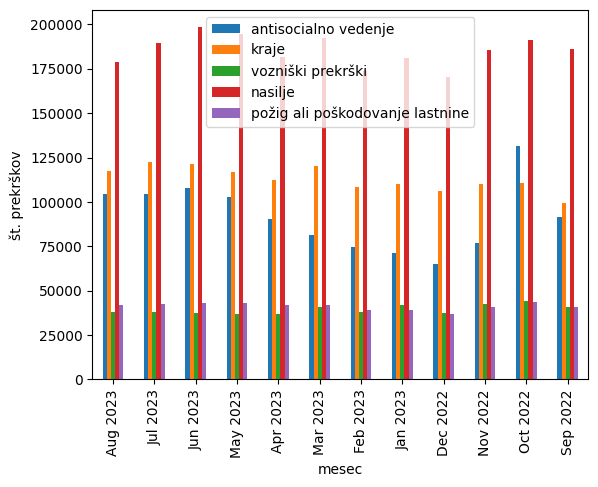

In [154]:
import slovar_v_csv
import copy

zločini = slovar_v_csv.zločini
osnova = copy.deepcopy(enote_tabele[0])

for x in range(len(enote_tabele)-1):
    for y in zločini[1:]:
        osnova[y] = osnova[y] + enote_tabele[x][y]

osnova["kraje"] = osnova["rop"] + osnova["kraja v trgovini"] + osnova["ostale kraje"] + osnova["kraja kolesa"] + osnova["oropanje osebe"]
osnova2 = osnova[["mesec", "antisocialno vedenje", "kraje", "vozniški prekrški", "nasilje", "požig ali poškodovanje lastnine"]]

osnova2.plot.bar(x="mesec").set(ylabel="št. prekrškov")

Kot lahko opazimo, je pozimi storjenih manj prekrškov kot tekom poletja. Najočitnejša razlika je opazna pri antisocialnem vedenju, najmanjša pa pri vozniških prekrških ter pri požigih in antisocialnem vedenju. Opazno je tudi, da so najpogostejši prekrški povezani z nasiljem. Lahko preverimo še kateri mesec je v skupnem najbolj poln prekrškov. V spodnjem seznamu so razporejeni meseci glede na število prekrškov (vsota vseh):

In [155]:
osnova["skupno"] = osnova[zločini[1:]].sum(axis=1)
osnova.sort_values("skupno")[::-1].reset_index(drop=True)[["mesec", "skupno"]]

,mesec,skupno
0,Oct 2022,624050
1,Jun 2023,604224
2,Jul 2023,591692
3,May 2023,591095
4,Mar 2023,573671
5,Aug 2023,572983
6,Sep 2022,558108
7,Apr 2023,555470
8,Nov 2022,553846
9,Jan 2023,535414


Tudi sedaj opazimo, da so zimski meseci čisto na dnu seznama, poletni pa so bližje vrhu. Da bi naslednje izvedeli, katero območje je najbolj varno za turiste, moramo pogledati, kako pogosti so prekrški, ki bi lahko ogrožali varnost turista glede na velikost populacije. Prekrški, ki bi se lahko zgodili turistu vključujejo nasilje, vlomi, ropi, kraje, požigi in poškodovanje lastnine, oropanje osebe ter prištejmo še nespecificirane/ostale prekrške. Populacijo določene regije pa ne dobimo na spletni strani te regije, temveč pa na osnovni strani [UK Crime Stats](https://www.ukcrimestats.com/Police_Forces/), katere kodo smo zajeli v datoteko [stran_osnova.html](stran_osnova.html). Tekom analize zanemarjamo spremembe v populaciji, saj podatki niso povsem natančni, niti spremembe niso dovolj velike, da bi bistveno vplivale na rezultate.

<AxesSubplot:xlabel='enota'>

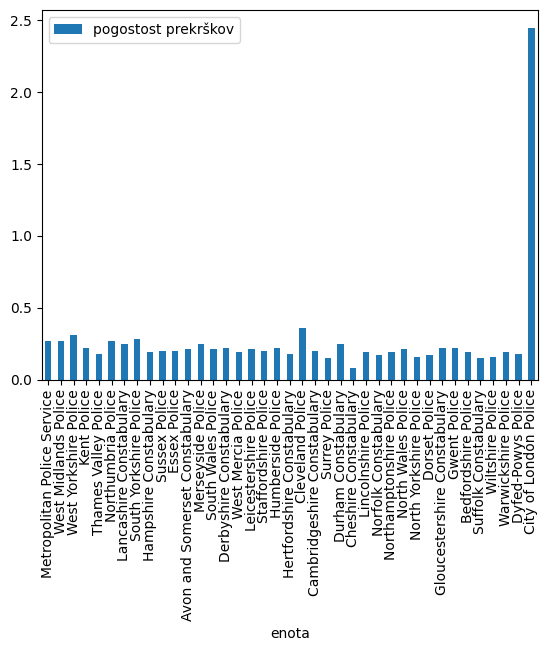

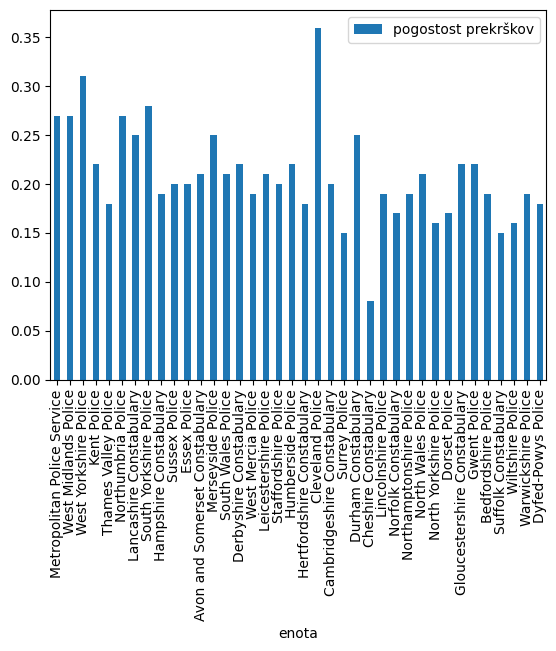

In [156]:
import poberi

slovar = poberi.slovar
pomozni_slovar = {"enota": [], "populacija" : [], "število prekrškov": [], "pogostost prekrškov": []}

for enota in slovar_leto:
    populacija = slovar[enota][1]
    št_prekrskov = 0
    for mesec in slovar_leto[enota]:
        št_prekrskov += sum(slovar_leto[enota][mesec])
    pomozni_slovar["enota"].append(enota)
    pomozni_slovar["populacija"].append(populacija)
    pomozni_slovar["število prekrškov"].append(št_prekrskov)
    pomozni_slovar["pogostost prekrškov"].append(round(št_prekrskov/populacija, 2))
    
tabela = pd.DataFrame(pomozni_slovar)
tabela.plot.bar(x="enota", y="pogostost prekrškov")
tabela.iloc[:-1].plot.bar(x="enota", y="pogostost prekrškov")

Ko izvedemo program, smo iz grafa zgoraj opazili, da je v postaji *City of London Police* po vsej verjetnosti prišlo do napake pri beleženju populacije, ali števila prekrškov. Zato smo upoštevali to postajo kot nepravilno beleženo in jo zato odstranili iz naše tabele. Za ostale enote smo torej naredili še en (spodnji) graf. Oglejmo si sedaj še točnejše številke:

In [159]:
tabela.iloc[:-1].sort_values("pogostost prekrškov").reset_index(drop=True)

,enota,populacija,število prekrškov,pogostost prekrškov
0,Cheshire Constabulary,2054257,170802,0.08
1,Suffolk Constabulary,767934,111476,0.15
2,Surrey Police,1130318,170896,0.15
3,North Yorkshire Police,795509,130922,0.16
4,Wiltshire Police,669782,107758,0.16
...,...,...,...,...
33,West Midlands Police,2734184,745572,0.27
34,Metropolitan Police Service,8147463,2233298,0.27
35,South Yorkshire Police,1341910,371004,0.28
36,West Yorkshire Police,2221714,678422,0.31


Razjasnili smo, da so torej najbolj varna območja Cheshire, Suffolk in Surrey, najnevarnejša pa South in West Yorkshire ter Cleveland. Kot turisti bi seveda potovali v najvarnejše predele, zato si oglejmo le še kateri mesec je za posamezno območje najbolj varen. Spet bomo upoštevali le iste prekrške kot zgoraj, to so tisti, ki bi nas kot turista lahko skrbeli. 

In [158]:
seznam_enot = ["Cheshire Constabulary", "Suffolk Constabulary", "Surrey Police"]
seznam_prekrskov = ["antisocialno vedenje", "vozniški prekrški", "nasilje", "požig ali poškodovanje lastnine", "rop", "kraja v trgovini", "ostale kraje", "kraja kolesa", "oropanje osebe"]

pomozni_slovar = {"enota": [], "mesec": []}

for enota in seznam_enot:
    lokalna_tabela = pd.read_csv(f'csv_datoteke/{enota.replace(" ", "_")}.csv')
    lokalna_tabela["SUM"] = lokalna_tabela[seznam_prekrskov].sum(axis=1)
    pomozni_slovar["mesec"].append(lokalna_tabela.sort_values("SUM").iloc[0]["mesec"])
    pomozni_slovar["enota"].append(enota)
     
     
resitev = pd.DataFrame(pomozni_slovar)
resitev
    

,enota,mesec
0,Cheshire Constabulary,Dec 2022
1,Suffolk Constabulary,Dec 2022
2,Surrey Police,Dec 2022


Kot lahko opazimo, je za vsa tri območja najvarnejši mesec December. Tako je torej najvarnejša opcija za potovanje decemberski izlet v Cheshire, s čimer smo odgovorili tudi na drugo vprašanje.

## Zaključek

Po analizi podatkov lahko zaključimo, da je število prekrškov povezano z letnim časom - pozimi je prekrškov manj kot poleti. Najnevarnejši mesci v VB so oktober, junij in julij, najmanj nevarni pa januar, februar in december. Ugotovimo tudi, da so najvarnejša območja za potencialnega turista Cheshire, suffolk in Surrey, kamor se turistu iz varnostnega vidika najbolj splača iti decembra, ko je pogostost prekrškov najmanjša.